####Twitter Sentiment Analysis

Importing all the libraries

In [39]:
import pandas as pd
import numpy as np
import textblob as TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import os
import re as re
import nltk
from nltk.tokenize import TweetTokenizer
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from scipy import sparse
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Read the data


In [40]:
data = pd.read_csv("/content/msft_merged.csv")

Data preprocessing

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17326 entries, 0 to 17325
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  17326 non-null  object
 1   Text      17325 non-null  object
dtypes: object(2)
memory usage: 270.8+ KB


In [42]:
data.shape

(17326, 2)

In [43]:
data.head()

,Datetime,Text
0,2020-05-31 23:06:34+00:00,MSFT Long our Short - #MSFT chart https://t.c...
1,2020-05-31 20:15:47+00:00,ForexAnalytix Interview: The Case For Value Ov...
2,2020-05-31 19:32:52+00:00,Group 3 Stocks &amp; ETF charts are updated in...
3,2020-05-31 19:27:36+00:00,"_\n\nDon Mattrick ""left"" #MSFT for telling the..."
4,2020-05-31 19:26:06+00:00,"As the lockdown hasn't ended, protests are eru..."


In [44]:
data.tail()

,Datetime,Text
17321,2021-01-01 05:05:52+00:00,"If you #trade #stocks like #FB, #AAPL, #AMZN, ..."
17322,2021-01-01 02:20:30+00:00,Financials of #Microsoft #MSFT $MSFT https://t...
17323,2021-01-01 01:22:50+00:00,Did you know that there is a Windows feature t...
17324,2021-01-01 01:17:19+00:00,We are freaking out about this because… among ...
17325,,NaN


In [45]:
data = data.dropna()
data

,Datetime,Text
0,2020-05-31 23:06:34+00:00,MSFT Long our Short - #MSFT chart https://t.c...
1,2020-05-31 20:15:47+00:00,ForexAnalytix Interview: The Case For Value Ov...
2,2020-05-31 19:32:52+00:00,Group 3 Stocks &amp; ETF charts are updated in...
3,2020-05-31 19:27:36+00:00,"_\n\nDon Mattrick ""left"" #MSFT for telling the..."
4,2020-05-31 19:26:06+00:00,"As the lockdown hasn't ended, protests are eru..."
...,...,...
17320,2021-01-01 05:40:03+00:00,Ending this year with small Boom .. #BABA #AAP...
17321,2021-01-01 05:05:52+00:00,"If you #trade #stocks like #FB, #AAPL, #AMZN, ..."
17322,2021-01-01 02:20:30+00:00,Financials of #Microsoft #MSFT $MSFT https://t...
17323,2021-01-01 01:22:50+00:00,Did you know that there is a Windows feature t...


In [46]:
# cleaning unnecessary text from data
data.Text = data.Text.str.lower() #convert text to lower case
data.Text = data.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
data.Text = data.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
data.Text = data.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
data.Text = data.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))
data

,Datetime,Text
0,2020-05-31 23:06:34+00:00,msft long our short msft chart
1,2020-05-31 20:15:47+00:00,forexanalytix interview the case for value ove...
2,2020-05-31 19:32:52+00:00,group 3 stocks etf charts are updated in 4 ti...
3,2020-05-31 19:27:36+00:00,_\n\ndon mattrick left msft for telling the tr...
4,2020-05-31 19:26:06+00:00,as the lockdown hasnt ended protests are erupt...
...,...,...
17320,2021-01-01 05:40:03+00:00,ending this year with small boom baba aapl nf...
17321,2021-01-01 05:05:52+00:00,if you trade stocks like fb aapl amzn amd goog...
17322,2021-01-01 02:20:30+00:00,financials of microsoft msft msft
17323,2021-01-01 01:22:50+00:00,did you know that there is a windows feature t...


In [47]:
#sorting the data datewise
data1 = data.sort_values(['Datetime'])
data1.head()

,Datetime,Text
3537,2020-01-01 00:45:02+00:00,microsoft and oracle extend multicloud partner...
3536,2020-01-01 00:56:57+00:00,top 10 trades of the decade number 4 going lon...
3535,2020-01-01 01:15:33+00:00,coach carroll and dangeruss are ready for the ...
3534,2020-01-01 01:40:03+00:00,microsoft and oracle extend multicloud partner...
3533,2020-01-01 02:30:06+00:00,microsoft news recap microsoft teams gets linu...


######DATA VISUALISATION

In [48]:
from textblob import TextBlob

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

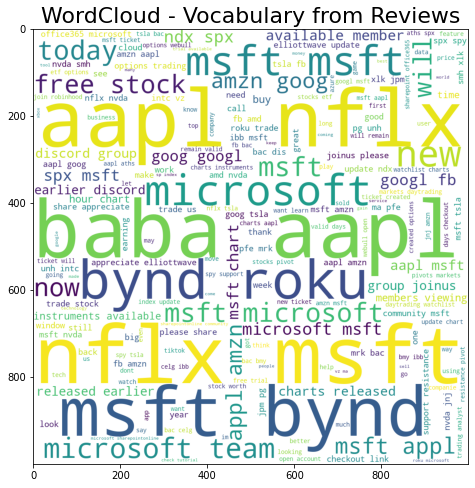

In [49]:
from wordcloud import WordCloud
allwords= ' '.join(twts for twts in data1['Text'] )
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate(allwords)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [50]:
def getSubjectivity(data1):
    return TextBlob(data1).sentiment.subjectivity
def getPolarity(data1):
    return TextBlob(data1).sentiment.polarity

data1['Subjectivity'] = data1['Text'].apply(getSubjectivity)
data1['Polarity'] = data1['Text'].apply(getPolarity)
data1

,Datetime,Text,Subjectivity,Polarity
3537,2020-01-01 00:45:02+00:00,microsoft and oracle extend multicloud partner...,0.000000,0.000000
3536,2020-01-01 00:56:57+00:00,top 10 trades of the decade number 4 going lon...,0.450000,0.225000
3535,2020-01-01 01:15:33+00:00,coach carroll and dangeruss are ready for the ...,0.477273,0.168182
3534,2020-01-01 01:40:03+00:00,microsoft and oracle extend multicloud partner...,0.000000,0.000000
3533,2020-01-01 02:30:06+00:00,microsoft news recap microsoft teams gets linu...,0.500000,0.500000
...,...,...,...,...
11397,2021-09-20 18:59:36+00:00,\nmsft put\nmsft\nmsft\n\n,0.000000,0.000000
11396,2021-09-20 19:50:08+00:00,the what the why the how of for partners in...,0.000000,0.000000
11395,2021-09-20 20:19:13+00:00,the new mural app is here to enhance visual te...,0.227273,0.068182
3538,Datetime,text,0.000000,0.000000


In [51]:
def getAnalysis(score):
    if score < 0:
        return 'Negitive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data1['Analysis'] = data1['Polarity'].apply(getAnalysis)
data1

,Datetime,Text,Subjectivity,Polarity,Analysis
3537,2020-01-01 00:45:02+00:00,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral
3536,2020-01-01 00:56:57+00:00,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive
3535,2020-01-01 01:15:33+00:00,coach carroll and dangeruss are ready for the ...,0.477273,0.168182,Positive
3534,2020-01-01 01:40:03+00:00,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral
3533,2020-01-01 02:30:06+00:00,microsoft news recap microsoft teams gets linu...,0.500000,0.500000,Positive
...,...,...,...,...,...
11397,2021-09-20 18:59:36+00:00,\nmsft put\nmsft\nmsft\n\n,0.000000,0.000000,Neutral
11396,2021-09-20 19:50:08+00:00,the what the why the how of for partners in...,0.000000,0.000000,Neutral
11395,2021-09-20 20:19:13+00:00,the new mural app is here to enhance visual te...,0.227273,0.068182,Positive
3538,Datetime,text,0.000000,0.000000,Neutral


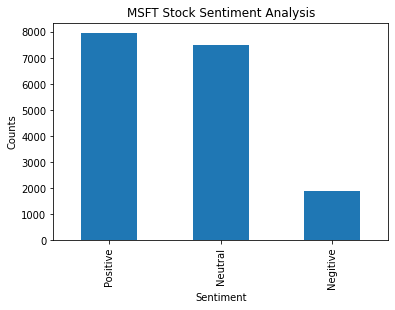

In [52]:
data1['Analysis'].value_counts()

plt.title('MSFT Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data1['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

###MANIPULATING THE DATE AND TIME COLUMN

In [53]:
data1['Datetime'] = data1['Datetime'].apply(lambda x:x[:19])

In [54]:
a = list(data1["Datetime"].apply(lambda x:len(x)>4))

In [55]:
data1["Date"] = pd.to_datetime(data1["Datetime"],errors="coerce")

In [56]:
data1

,Datetime,Text,Subjectivity,Polarity,Analysis,Date
3537,2020-01-01 00:45:02,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 00:45:02
3536,2020-01-01 00:56:57,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57
3535,2020-01-01 01:15:33,coach carroll and dangeruss are ready for the ...,0.477273,0.168182,Positive,2020-01-01 01:15:33
3534,2020-01-01 01:40:03,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 01:40:03
3533,2020-01-01 02:30:06,microsoft news recap microsoft teams gets linu...,0.500000,0.500000,Positive,2020-01-01 02:30:06
...,...,...,...,...,...,...
11397,2021-09-20 18:59:36,\nmsft put\nmsft\nmsft\n\n,0.000000,0.000000,Neutral,2021-09-20 18:59:36
11396,2021-09-20 19:50:08,the what the why the how of for partners in...,0.000000,0.000000,Neutral,2021-09-20 19:50:08
11395,2021-09-20 20:19:13,the new mural app is here to enhance visual te...,0.227273,0.068182,Positive,2021-09-20 20:19:13
3538,Datetime,text,0.000000,0.000000,Neutral,NaT


In [57]:
data2 = pd.get_dummies(data1['Analysis'])
data2

,Negitive,Neutral,Positive
3537,0,1,0
3536,0,0,1
3535,0,0,1
3534,0,1,0
3533,0,0,1
...,...,...,...
11397,0,1,0
11396,0,1,0
11395,0,0,1
3538,0,1,0


In [58]:
data1

,Datetime,Text,Subjectivity,Polarity,Analysis,Date
3537,2020-01-01 00:45:02,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 00:45:02
3536,2020-01-01 00:56:57,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57
3535,2020-01-01 01:15:33,coach carroll and dangeruss are ready for the ...,0.477273,0.168182,Positive,2020-01-01 01:15:33
3534,2020-01-01 01:40:03,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 01:40:03
3533,2020-01-01 02:30:06,microsoft news recap microsoft teams gets linu...,0.500000,0.500000,Positive,2020-01-01 02:30:06
...,...,...,...,...,...,...
11397,2021-09-20 18:59:36,\nmsft put\nmsft\nmsft\n\n,0.000000,0.000000,Neutral,2021-09-20 18:59:36
11396,2021-09-20 19:50:08,the what the why the how of for partners in...,0.000000,0.000000,Neutral,2021-09-20 19:50:08
11395,2021-09-20 20:19:13,the new mural app is here to enhance visual te...,0.227273,0.068182,Positive,2021-09-20 20:19:13
3538,Datetime,text,0.000000,0.000000,Neutral,NaT


In [59]:
data3 = pd.concat([data1,data2],axis=1)
data3

,Datetime,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive
3537,2020-01-01 00:45:02,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 00:45:02,0,1,0
3536,2020-01-01 00:56:57,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57,0,0,1
3535,2020-01-01 01:15:33,coach carroll and dangeruss are ready for the ...,0.477273,0.168182,Positive,2020-01-01 01:15:33,0,0,1
3534,2020-01-01 01:40:03,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 01:40:03,0,1,0
3533,2020-01-01 02:30:06,microsoft news recap microsoft teams gets linu...,0.500000,0.500000,Positive,2020-01-01 02:30:06,0,0,1
...,...,...,...,...,...,...,...,...,...
11397,2021-09-20 18:59:36,\nmsft put\nmsft\nmsft\n\n,0.000000,0.000000,Neutral,2021-09-20 18:59:36,0,1,0
11396,2021-09-20 19:50:08,the what the why the how of for partners in...,0.000000,0.000000,Neutral,2021-09-20 19:50:08,0,1,0
11395,2021-09-20 20:19:13,the new mural app is here to enhance visual te...,0.227273,0.068182,Positive,2021-09-20 20:19:13,0,0,1
3538,Datetime,text,0.000000,0.000000,Neutral,NaT,0,1,0


In [60]:
data3 = data3.drop(['Datetime'],axis=1)
data3.head()

,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive
3537,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 00:45:02,0,1,0
3536,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57,0,0,1
3535,coach carroll and dangeruss are ready for the ...,0.477273,0.168182,Positive,2020-01-01 01:15:33,0,0,1
3534,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 01:40:03,0,1,0
3533,microsoft news recap microsoft teams gets linu...,0.500000,0.500000,Positive,2020-01-01 02:30:06,0,0,1


In [61]:
data3['Year'] = data3['Date'].dt.year
data3['Month'] = data3['Date'].dt.month
data3['Day'] = data3['Date'].dt.day
data3

,Text,Subjectivity,Polarity,Analysis,Date,Negitive,Neutral,Positive,Year,Month,Day
3537,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 00:45:02,0,1,0,2020.0,1.0,1.0
3536,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,Positive,2020-01-01 00:56:57,0,0,1,2020.0,1.0,1.0
3535,coach carroll and dangeruss are ready for the ...,0.477273,0.168182,Positive,2020-01-01 01:15:33,0,0,1,2020.0,1.0,1.0
3534,microsoft and oracle extend multicloud partner...,0.000000,0.000000,Neutral,2020-01-01 01:40:03,0,1,0,2020.0,1.0,1.0
3533,microsoft news recap microsoft teams gets linu...,0.500000,0.500000,Positive,2020-01-01 02:30:06,0,0,1,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11397,\nmsft put\nmsft\nmsft\n\n,0.000000,0.000000,Neutral,2021-09-20 18:59:36,0,1,0,2021.0,9.0,20.0
11396,the what the why the how of for partners in...,0.000000,0.000000,Neutral,2021-09-20 19:50:08,0,1,0,2021.0,9.0,20.0
11395,the new mural app is here to enhance visual te...,0.227273,0.068182,Positive,2021-09-20 20:19:13,0,0,1,2021.0,9.0,20.0
3538,text,0.000000,0.000000,Neutral,NaT,0,1,0,NaN,NaN,NaN


In [62]:
data11 = data3.drop(['Text', 'Subjectivity','Polarity',	'Analysis',	'Date',	'Negitive',	'Neutral',	'Positive'],axis=1)
data11

,Year,Month,Day
3537,2020.0,1.0,1.0
3536,2020.0,1.0,1.0
3535,2020.0,1.0,1.0
3534,2020.0,1.0,1.0
3533,2020.0,1.0,1.0
...,...,...,...
11397,2021.0,9.0,20.0
11396,2021.0,9.0,20.0
11395,2021.0,9.0,20.0
3538,NaN,NaN,NaN


In [67]:
data3.insert(3, 'StockName', 'MSFT')
data3

,Text,Subjectivity,Polarity,StockName,Analysis,Date,Negitive,Neutral,Positive,Year,Month,Day
3537,microsoft and oracle extend multicloud partner...,0.000000,0.000000,MSFT,Neutral,2020-01-01 00:45:02,0,1,0,2020.0,1.0,1.0
3536,top 10 trades of the decade number 4 going lon...,0.450000,0.225000,MSFT,Positive,2020-01-01 00:56:57,0,0,1,2020.0,1.0,1.0
3535,coach carroll and dangeruss are ready for the ...,0.477273,0.168182,MSFT,Positive,2020-01-01 01:15:33,0,0,1,2020.0,1.0,1.0
3534,microsoft and oracle extend multicloud partner...,0.000000,0.000000,MSFT,Neutral,2020-01-01 01:40:03,0,1,0,2020.0,1.0,1.0
3533,microsoft news recap microsoft teams gets linu...,0.500000,0.500000,MSFT,Positive,2020-01-01 02:30:06,0,0,1,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11397,\nmsft put\nmsft\nmsft\n\n,0.000000,0.000000,MSFT,Neutral,2021-09-20 18:59:36,0,1,0,2021.0,9.0,20.0
11396,the what the why the how of for partners in...,0.000000,0.000000,MSFT,Neutral,2021-09-20 19:50:08,0,1,0,2021.0,9.0,20.0
11395,the new mural app is here to enhance visual te...,0.227273,0.068182,MSFT,Positive,2021-09-20 20:19:13,0,0,1,2021.0,9.0,20.0
3538,text,0.000000,0.000000,MSFT,Neutral,NaT,0,1,0,NaN,NaN,NaN


In [68]:
data4 = data3.drop(['Text', 'Subjectivity', 'Polarity','Analysis'], axis = 1)
data4

,StockName,Date,Negitive,Neutral,Positive,Year,Month,Day
3537,MSFT,2020-01-01 00:45:02,0,1,0,2020.0,1.0,1.0
3536,MSFT,2020-01-01 00:56:57,0,0,1,2020.0,1.0,1.0
3535,MSFT,2020-01-01 01:15:33,0,0,1,2020.0,1.0,1.0
3534,MSFT,2020-01-01 01:40:03,0,1,0,2020.0,1.0,1.0
3533,MSFT,2020-01-01 02:30:06,0,0,1,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...
11397,MSFT,2021-09-20 18:59:36,0,1,0,2021.0,9.0,20.0
11396,MSFT,2021-09-20 19:50:08,0,1,0,2021.0,9.0,20.0
11395,MSFT,2021-09-20 20:19:13,0,0,1,2021.0,9.0,20.0
3538,MSFT,NaT,0,1,0,NaN,NaN,NaN


In [69]:
data5 = data4.drop(['Year','Month','Day'], axis = 1)
data5

,StockName,Date,Negitive,Neutral,Positive
3537,MSFT,2020-01-01 00:45:02,0,1,0
3536,MSFT,2020-01-01 00:56:57,0,0,1
3535,MSFT,2020-01-01 01:15:33,0,0,1
3534,MSFT,2020-01-01 01:40:03,0,1,0
3533,MSFT,2020-01-01 02:30:06,0,0,1
...,...,...,...,...,...
11397,MSFT,2021-09-20 18:59:36,0,1,0
11396,MSFT,2021-09-20 19:50:08,0,1,0
11395,MSFT,2021-09-20 20:19:13,0,0,1
3538,MSFT,NaT,0,1,0


In [70]:
data6 = data5.groupby([data4['Date'].dt.date]).sum()
data6

,Negitive,Neutral,Positive
Date,,,
2020-01-01,0,13,7
2020-01-02,1,7,8
2020-01-03,2,3,11
2020-01-04,1,1,3
2020-01-05,1,2,2
...,...,...,...
2021-09-16,2,16,12
2021-09-17,3,5,7
2021-09-18,0,5,3


In [71]:
data6.head()

,Negitive,Neutral,Positive
Date,,,
2020-01-01,0,13,7
2020-01-02,1,7,8
2020-01-03,2,3,11
2020-01-04,1,1,3
2020-01-05,1,2,2


In [72]:
data6['Total Tweets'] = data6['Positive']+  data6['Negitive']+  data6['Neutral']
data6

,Negitive,Neutral,Positive,Total Tweets
Date,,,,
2020-01-01,0,13,7,20
2020-01-02,1,7,8,16
2020-01-03,2,3,11,16
2020-01-04,1,1,3,5
2020-01-05,1,2,2,5
...,...,...,...,...
2021-09-16,2,16,12,30
2021-09-17,3,5,7,15
2021-09-18,0,5,3,8


In [73]:
data13 = data6.reset_index()
data13

,Date,Negitive,Neutral,Positive,Total Tweets
0,2020-01-01,0,13,7,20
1,2020-01-02,1,7,8,16
2,2020-01-03,2,3,11,16
3,2020-01-04,1,1,3,5
4,2020-01-05,1,2,2,5
...,...,...,...,...,...
623,2021-09-16,2,16,12,30
624,2021-09-17,3,5,7,15
625,2021-09-18,0,5,3,8
626,2021-09-19,0,7,2,9


In [74]:
data13['Date']=pd.to_datetime(data13.Date, format='%Y/%m/%d')
data13['Year'] = data13['Date'].dt.year
data13['Month'] = data13['Date'].dt.month
data13['Day'] = data13['Date'].dt.day
data13

,Date,Negitive,Neutral,Positive,Total Tweets,Year,Month,Day
0,2020-01-01,0,13,7,20,2020,1,1
1,2020-01-02,1,7,8,16,2020,1,2
2,2020-01-03,2,3,11,16,2020,1,3
3,2020-01-04,1,1,3,5,2020,1,4
4,2020-01-05,1,2,2,5,2020,1,5
...,...,...,...,...,...,...,...,...
623,2021-09-16,2,16,12,30,2021,9,16
624,2021-09-17,3,5,7,15,2021,9,17
625,2021-09-18,0,5,3,8,2021,9,18
626,2021-09-19,0,7,2,9,2021,9,19


In [75]:
data14 = data13.drop(['Date'],axis=1)
data14

,Negitive,Neutral,Positive,Total Tweets,Year,Month,Day
0,0,13,7,20,2020,1,1
1,1,7,8,16,2020,1,2
2,2,3,11,16,2020,1,3
3,1,1,3,5,2020,1,4
4,1,2,2,5,2020,1,5
...,...,...,...,...,...,...,...
623,2,16,12,30,2021,9,16
624,3,5,7,15,2021,9,17
625,0,5,3,8,2021,9,18
626,0,7,2,9,2021,9,19


In [76]:
data14.to_csv('/content/sample_data/msft_merged.csv')